inspired in youtube videos: "Advance House Price Prediction- Exploratory Data Analysis", "Beginner Kaggle Data Science Project Walk-Through (Titanic)", and book "Hands-On Machine LEarning with... Aurelien Geron"

# Hepatitis initial data analysis

### Import libraries and data

In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
hepatitis_file_path = "/content/drive/My Drive/Colab Notebooks/Mini Project 1 ECSE 551 Team 2/hepatitis.csv"
df_data = pd.read_csv(hepatitis_file_path)
%matplotlib inline

### 1. Preliminary Data Analysis

####1.1 Shape, head, columns, info, describe

In [36]:
df_data.shape

(142, 20)

In [61]:
df_data.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,1


In [38]:
df_data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'ClassLabel'],
      dtype='object')

In [39]:
#Quick look at data types and no-null values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             142 non-null    int64  
 1   sex             142 non-null    int64  
 2   steroid         142 non-null    int64  
 3   antivirals      142 non-null    int64  
 4   fatigue         142 non-null    int64  
 5   malaise         142 non-null    int64  
 6   anorexia        142 non-null    int64  
 7   liver_big       142 non-null    int64  
 8   liver_firm      142 non-null    int64  
 9   spleen_palable  142 non-null    int64  
 10  spiders         142 non-null    int64  
 11  ascites         142 non-null    int64  
 12  varices         142 non-null    int64  
 13  bilirubin       142 non-null    float64
 14  alk_phosphate   142 non-null    int64  
 15  sgot            142 non-null    int64  
 16  albumin         142 non-null    float64
 17  protime         142 non-null    int

In [40]:
# Info on the numeric data with the describe() method
df_data.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662,0.816901
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575,0.388116
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000,1.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000,1.000000


#### 1.1 Features classification : continuous and discrete

In [41]:
# Separate the features into continous and discrete

discrete_features = [ feature for feature in df_data if len(df_data[feature].unique()) < 25]
#drop Class Label, which is the target
discrete_features = discrete_features[:-1]

continuous_features = [feature for feature in df_data if feature not in discrete_features + ['ClassLabel']]

In [63]:
continuous_features

['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

###2. Discrete Features Analysis

#### 2.1 Bar Plots

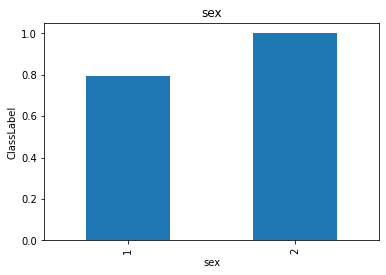

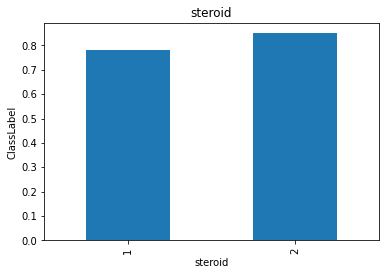

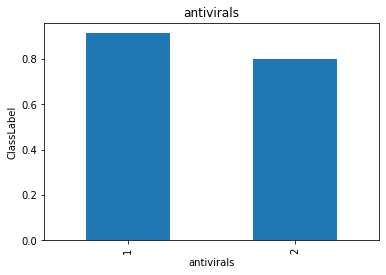

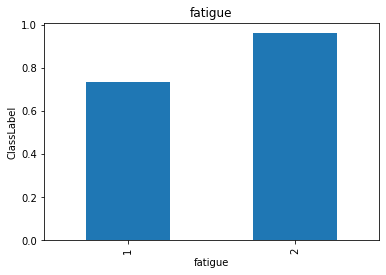

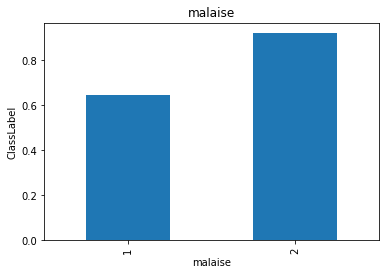

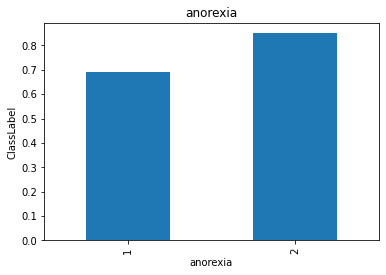

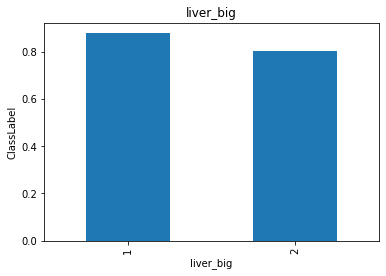

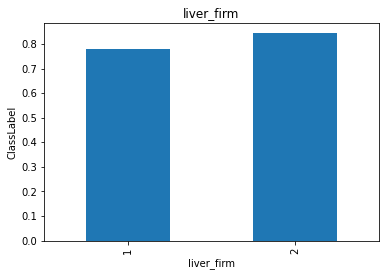

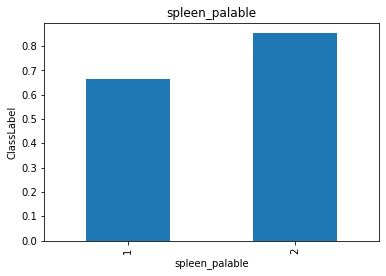

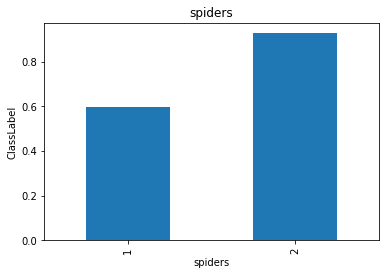

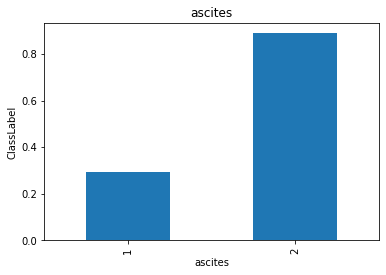

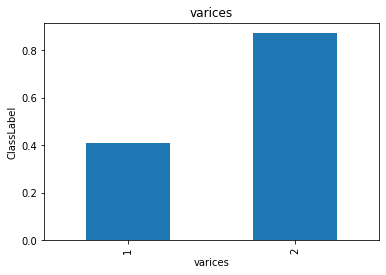

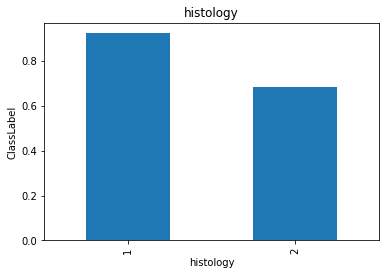

In [42]:
# ClassLAbel dependence on classes of discrete_features
for feature in discrete_features:
  data = df_data.copy()
  data.groupby(feature)['ClassLabel'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('ClassLabel')
  plt.title(feature)
  plt.show()

### 3. Continuous Features Analysis

#### 3.1 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73010c3320>,
      dtype=object)

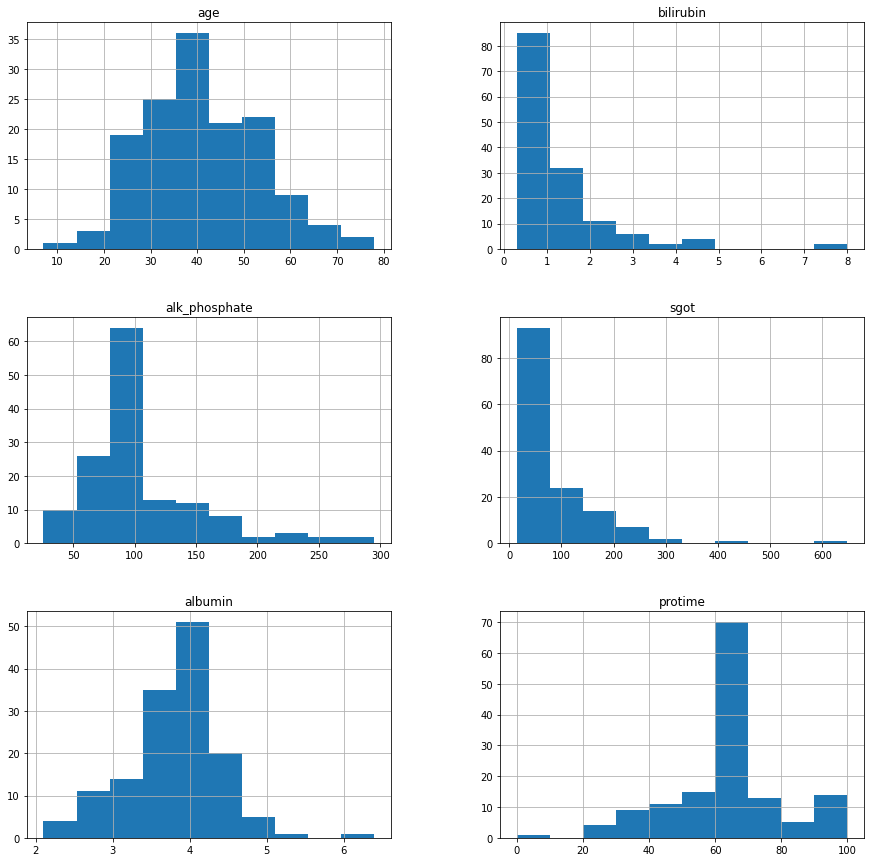

In [43]:
 # distribution of continuous_features
df_data[continuous_features].hist(figsize=(15,15))

In [44]:
# Final discussion: some of the features are skewed and far from gaussian distribution
# Proposal: use their logarithms or some kind of normalization instead
# Proposal: use standarization! 

#### 3.2 Box Plots

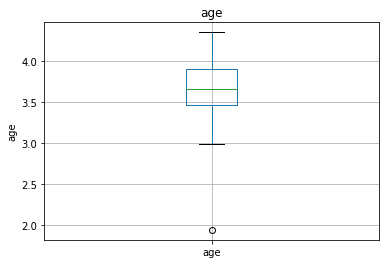

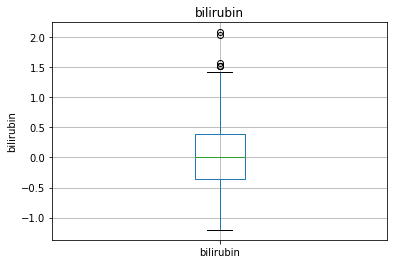

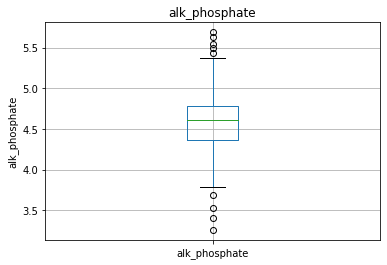

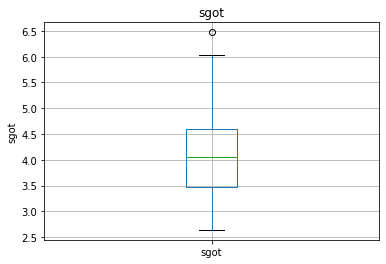

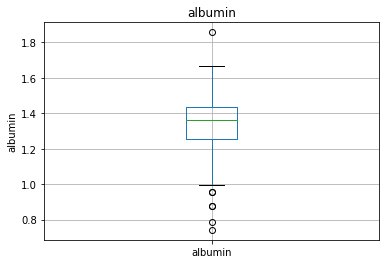

In [45]:
# Are there outliers in the continous features?
for feature in continuous_features:
  data = df_data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [46]:
# All features have outliers, but it is not worth it remove all of them
# By making standarization, we can be much less affected by outliers!!!

#### 3.3 Correlations

                    age  bilirubin  ...   protime  ClassLabel
age            1.000000   0.147050  ... -0.127427   -0.160050
bilirubin      0.147050   1.000000  ... -0.216918   -0.461533
alk_phosphate -0.030141   0.193034  ... -0.185960   -0.149718
sgot          -0.013709   0.289753  ... -0.101656   -0.025457
albumin       -0.216044  -0.406031  ...  0.294590    0.454181
protime       -0.127427  -0.216918  ...  1.000000    0.298737
ClassLabel    -0.160050  -0.461533  ...  0.298737    1.000000

[7 rows x 7 columns]


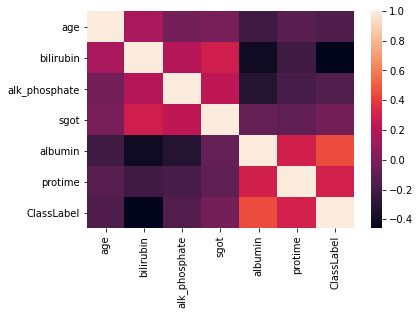

In [47]:
#Now let's look at correlations
corr_matrix = df_data[continuous_features+ ['ClassLabel']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix)


In [48]:
#Because  we are using regression, we want to avoid multi colinearity (two variables highly correlated).
# Correlations bigger than 0.3: albumin is negatively correlated with bilirubin,with alk_phospahete, and positively correlated with protime
# Correlations in 0.2 - 0.3: albumin is negatively correlated with age, protime neg with bilirubin, bilirubin wiht alk_phosphate, bilirubin with sgot,protime with albumin

In [49]:
corr_matrix['ClassLabel'].sort_values(ascending= False)

ClassLabel       1.000000
albumin          0.454181
protime          0.298737
sgot            -0.025457
alk_phosphate   -0.149718
age             -0.160050
bilirubin       -0.461533
Name: ClassLabel, dtype: float64

In [50]:
#Can easil see that albumin and bilirubin have strong effect on the class label

#### 3.4 Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72fa3e2198>,
      dtype=object)

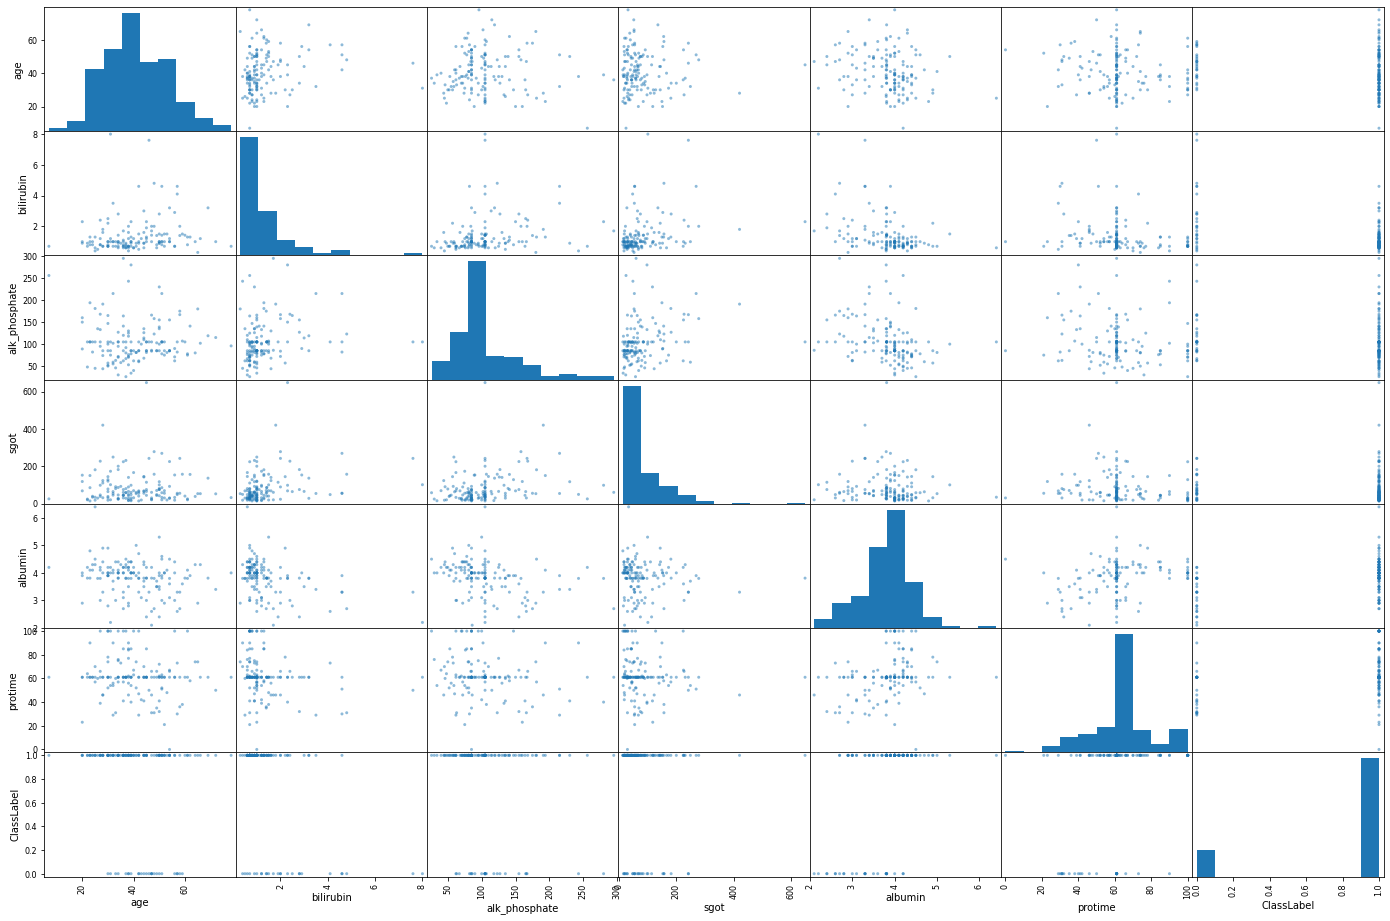

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_data[continuous_features+['ClassLabel']], figsize=(24,16) )

In [52]:
## Here we can also see some linearities between e.g. bilirubin and sgot

#### 3.5 Pivot table

In [53]:
# Compare 'Class label' across the numeric features
pd.pivot_table(df_data, index='ClassLabel', values = continuous_features)

,age,albumin,alk_phosphate,bilirubin,protime,sgot
ClassLabel,,,,,,
0,44.923077,3.239615,120.576923,2.516154,50.576923,87.923077
1,39.896552,3.962931,102.301724,1.128966,64.198276,82.517241


In [54]:
# We start seeing that younger people have more probability for 1, also those with more albumin, less alk_phosphate, much les bilirubin, more protime and less sgot.

### Final thoughts

- Many features are tail heavy: use their logarithms
- Many different scales: use standarization!!!
- There are a couple of features that are highly correlated with the target variable
- Try to combine some of the features to gain higher correlations with the target!!


### 4. Feature engineering

#### 4.1 Apply logarithms for more gaussian shaped distributions

In [55]:
def logarithm_transformer (data_frame):
  data= data_frame.copy()
  continuous_features = [ feature for feature in data if len(data[feature].unique()) > 25]
  print(continuous_features)
  for feature in continuous_features:
    if 0 in data[feature].unique():
      print(0)
    else:
      data[feature] = np.log(data[feature])
  return data

['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72f9831c18>,
      dtype=object)

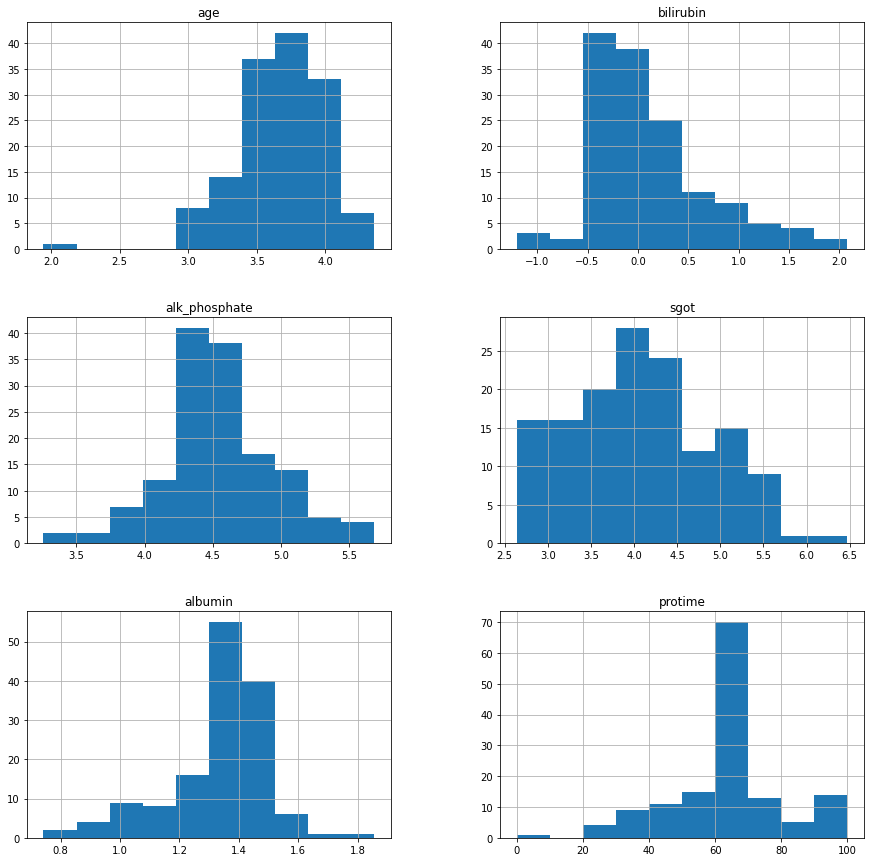

In [56]:
log_transformed_df = logarithm_transformer(df_data)
log_transformed_df[continuous_features].hist(figsize=(15,15))

#### 4.2 Standarize the data

In [57]:
def standard_scaler(data_frame):
  data= data_frame.copy()
  continuous_features = [ feature for feature in data if len(data[feature].unique()) > 25]
  for feature in continuous_features:
    data[feature] = data[feature] - np.mean(data[feature])
    data[feature] = data[feature] / np.std(data[feature])
  return data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72f91c56d8>,
      dtype=object)

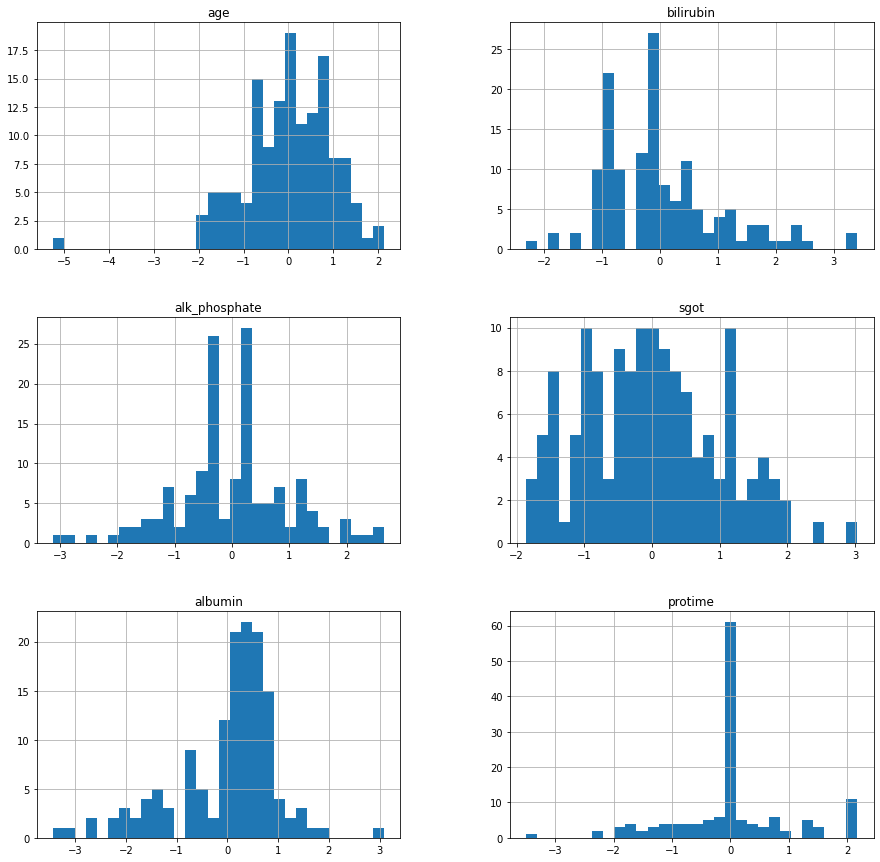

In [58]:
std_log_transformed_df = standard_scaler(log_transformed_df)
std_log_transformed_df[continuous_features].hist(bins=30, figsize=(15,15))

#### 4.3 Look for new features

In [59]:
# after the processing is done, we'll look for new features

## 5. Conclusion

In [60]:
# this is my conclusion